
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;🐍Python Refresher for Sustainable Energy Management Module
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;🎓Nottingham Trent University
______________________________________________________________________________________________________

## UK Generation Mix illustration ⚡🛢️💨🏭☀️🔌💡

## Outline
- Grid Data Sets
- Working with Dataframe
- Plot UK Generation Mix
- Filter the UK Generation Mix and find the Maximum and Minimum
- UK Generation Mix from 2009-2023
- UK Generation Mix-Carbon and Zero Carbon Generation
- UK Generation Mix-Carbon Intensity
- UK Generation Mix-Zero Carbon Operation (ZCO)
- 
UK Renewable Generation Trenp
- Time⌚to Code💻
_______________________________________________________________________________________________________________________________________________________

## Grid Data Sets

In [17]:
print("In this Workshop, we'll take a look inside UK Generation Mix")

In this Workshop, we'll take a look inside UK Generation Mix


There are many different websites that provide UK grid data sets or API we use:

- https://www.nationalgrideso.com/
- The data set can be downloaded at:
- https://www.nationalgrideso.com/data-portal/historic-generation-mix/historic_gb_generation_mix
- click on Annual historic data button and then download (csv) to download the Historic GB generation mix from the 1st of Jan 2009 through to today. (Data points are either MW or %) into the CSV file.
- If you take a look inside the CSV file on Excel you can see different raw and columns showing time and UK generation mix by source
- Rename the file to **annual_historic_data.csv** and put it inside the current working directory this ipython located

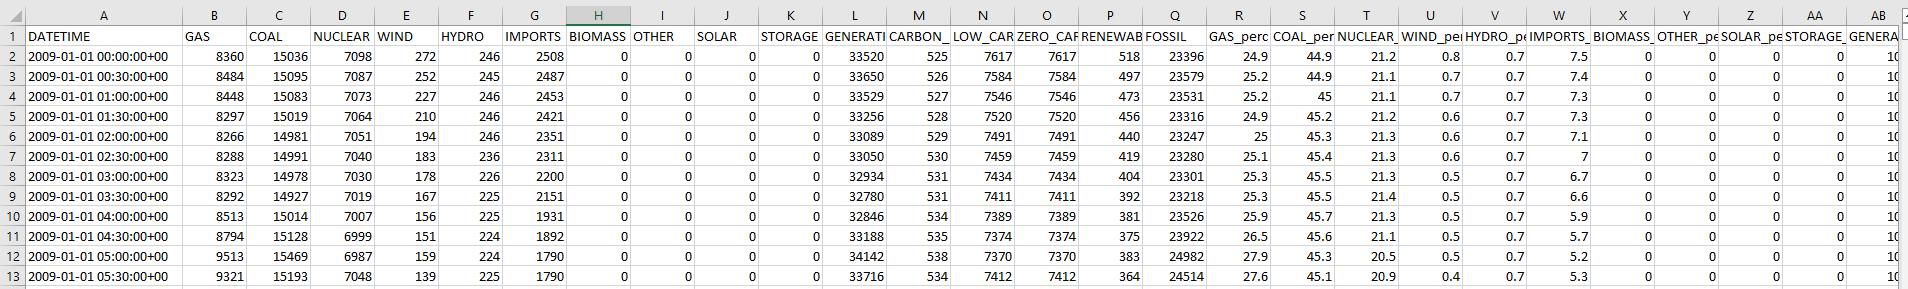

______________________________________________________________________________________________________
## Working with Dataframe

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the CSV file into a DataFrame
# Replace with the actual path to your CSV file or if the file is inside the ipython file directory you do not need the directory
# Just ensure you have the file on current directory
file_path = 'annual_historic_data.csv'  

In [19]:
df = pd.read_csv(file_path, delimiter=',')  # Using a comma as the delimiter of CSV file 
# there are other types of CSV file that may have a tab or enter as delimiter
# by type and entering the name of Dataframe you can see what is inside the df dataframe
# Convert the datetime column to datetime format
df['DATETIME'] = pd.to_datetime(df['DATETIME'])
# Format the datetime column to the desired format
df['DATETIME'] = df['DATETIME'].dt.strftime('%Y-%m-%d %H:%M:%S')

With using head and tail method you can see the datetime of UK generation data you got from national grid website the data shoud be from 2009 to the time you get data in half an hour samples

In [20]:
df.head()

,DATETIME,GAS,COAL,NUCLEAR,WIND,HYDRO,IMPORTS,BIOMASS,OTHER,SOLAR,...,IMPORTS_perc,BIOMASS_perc,OTHER_perc,SOLAR_perc,STORAGE_perc,GENERATION_perc,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc
0,2009-01-01 00:00:00,8359,15036,7098,273,246,2508,0,0,0,...,7.5,0.0,0.0,0.0,0.0,100,22.7,22.7,1.5,69.8
1,2009-01-01 00:30:00,8484,15095,7087,252,245,2487,0,0,0,...,7.4,0.0,0.0,0.0,0.0,100,22.5,22.5,1.5,70.1
2,2009-01-01 01:00:00,8447,15082,7073,227,246,2453,0,0,0,...,7.3,0.0,0.0,0.0,0.0,100,22.5,22.5,1.4,70.2
3,2009-01-01 01:30:00,8296,15019,7064,211,246,2421,0,0,0,...,7.3,0.0,0.0,0.0,0.0,100,22.6,22.6,1.4,70.1
4,2009-01-01 02:00:00,8266,14981,7051,194,246,2352,0,0,0,...,7.1,0.0,0.0,0.0,0.0,100,22.6,22.6,1.3,70.3


In [21]:
df.tail()

,DATETIME,GAS,COAL,NUCLEAR,WIND,HYDRO,IMPORTS,BIOMASS,OTHER,SOLAR,...,IMPORTS_perc,BIOMASS_perc,OTHER_perc,SOLAR_perc,STORAGE_perc,GENERATION_perc,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc
263632,2024-01-15 08:00:00,18926,1838,2932,16927,247,394,2341,599,13,...,0.9,5.3,1.4,0.0,0.2,100,50.7,45.4,38.8,46.9
263633,2024-01-15 08:30:00,18782,1842,2804,16878,261,288,2467,763,400,...,0.6,5.5,1.7,0.9,0.5,100,51.0,45.5,39.2,46.2
263634,2024-01-15 09:00:00,18577,1842,2756,16794,264,288,2632,674,1469,...,0.6,5.8,1.5,3.2,0.5,100,52.5,46.8,40.7,44.9
263635,2024-01-15 09:30:00,18456,1837,2480,16992,241,646,2814,584,2643,...,1.4,6.0,1.3,5.7,0.1,100,53.9,47.9,42.5,43.4
263636,2024-01-15 10:00:00,18255,1841,2476,16891,238,654,2869,389,3624,...,1.4,6.1,0.8,7.7,0.0,100,55.2,49.2,43.9,42.5


Consider a specific date and time and let see how much each source of energy produces in that time in UK

In [22]:
# Select a specific datetime
specified_time = '2009-01-01 00:00:00'
specified_time_data = df[df['DATETIME'] == specified_time]

UK Generation mix at 2009-01-01 00:00:00 consist of (MWh): 
GAS=8359, COAL=15036, NUCLEAR=7098, WIND=273, HYDRO=246, IMPORTS=2508, BIOMASS=0, OTHER=0, SOLAR=0, STORAGE=0


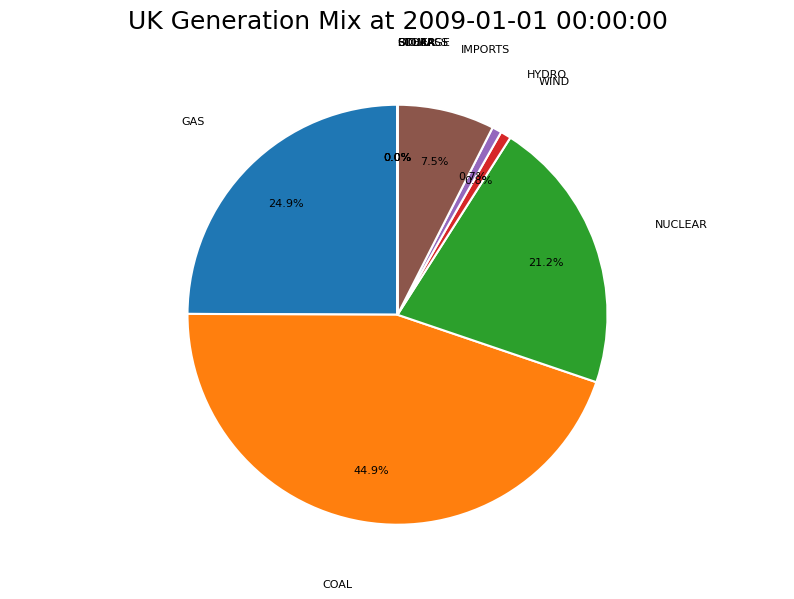

In [23]:
# Extract generation mix data
generation_mix = specified_time_data.iloc[0][['GAS', 'COAL', 'NUCLEAR', 'WIND', 'HYDRO', 'IMPORTS', 'BIOMASS', 'OTHER', 'SOLAR', 'STORAGE']]
# Extract generation mix index
generation_mix_labels = generation_mix.index
# Extract generation mix values
generation_mix_values = generation_mix.values

#Print Generation Mix data in selected datetime
print(f'UK Generation mix at {specified_time} consist of (MWh): \nGAS={generation_mix_values[0]}, COAL={generation_mix_values[1]}, NUCLEAR={generation_mix_values[2]}, WIND={generation_mix_values[3]}, HYDRO={generation_mix_values[4]}, IMPORTS={generation_mix_values[5]}, BIOMASS={generation_mix_values[6]}, OTHER={generation_mix_values[7]}, SOLAR={generation_mix_values[8]}, STORAGE={generation_mix_values[9]}')
# Plot the pie chart for Generation mix in specific time
plt.figure(figsize=(10, 6))
plt.pie(generation_mix_values, labels=generation_mix_labels, autopct='%1.1f%%', startangle=90,textprops={'fontsize':8},pctdistance=0.75, labeldistance=1.3, wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'})
plt.title(f"UK Generation Mix at {specified_time}", fontdict={"fontsize":18}, pad=40)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


______________________________________________________________________________________________________
## Plot UK Generation Mix🏭💡📈📊

#### Run this code below for different times 
- By entering different date-times and see how generation mix changes during years from 2009 **yearly** and day by day and season by season.

Enter your desired Time Stamp Like 2009-01-01 00:00:00 format:  2009-01-01 00:00:00


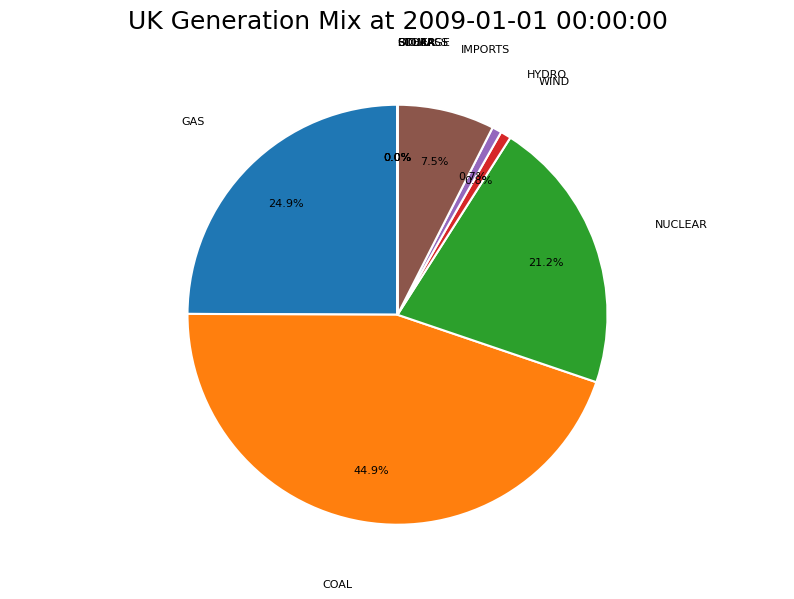

GAS=8359, COAL=15036, NUCLEAR=7098, WIND=273, HYDRO=246, IMPORTS=2508, BIOMASS=0, OTHER=0, SOLAR=0, STORAGE=0


In [25]:
# Select a specific datetime
specified_time = input("Enter your desired Time Stamp Like 2009-01-01 00:00:00 format: ")
specified_time_data = df[df['DATETIME'] == specified_time]
# Extract generation mix data
generation_mix = specified_time_data.iloc[0][['GAS', 'COAL', 'NUCLEAR', 'WIND', 'HYDRO', 'IMPORTS', 'BIOMASS', 'OTHER', 'SOLAR', 'STORAGE']]
generation_mix_labels = generation_mix.index
generation_mix_values = generation_mix.values

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(generation_mix_values, labels=generation_mix_labels, autopct='%1.1f%%', startangle=90,textprops={'fontsize':8},pctdistance=0.75, labeldistance=1.3, wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'})
plt.title(f"UK Generation Mix at {specified_time}", fontdict={"fontsize":18}, pad=40)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
print(f'GAS={generation_mix_values[0]}, COAL={generation_mix_values[1]}, NUCLEAR={generation_mix_values[2]}, WIND={generation_mix_values[3]}, HYDRO={generation_mix_values[4]}, IMPORTS={generation_mix_values[5]}, BIOMASS={generation_mix_values[6]}, OTHER={generation_mix_values[7]}, SOLAR={generation_mix_values[8]}, STORAGE={generation_mix_values[9]}')

______________________________________________________________________________________________________
## Filter the UK Generation Mix and find the Maximum and Minimum
Here, we Consider a time slot of 2023 and find each generation source's Maximum and Minimum
We also see when they happened in the UK Grid
You can change the time and see how it changes during an hour, a day, or any other. year

In [26]:
# Specify the time range
start_time = '2023-01-01 00:00:00'
end_time = '2023-12-31 23:59:59'

# Filter data between specific datetime values
filtered_data = df[(df['DATETIME'] >= start_time) & (df['DATETIME'] <= end_time)]

# Find maximum and minimum values for different generation sources
generation_sources = ['GAS', 'COAL', 'NUCLEAR', 'WIND', 'HYDRO', 'IMPORTS', 'BIOMASS', 'OTHER', 'SOLAR', 'STORAGE']

max_values = filtered_data[generation_sources].max()
min_values = filtered_data[generation_sources].min()

# Find the datetime when max and min occurred
datetime_max = {}
datetime_min = {}

for source in generation_sources:
    datetime_max[source] = filtered_data.loc[filtered_data[source] == max_values[source], 'DATETIME'].values[0]
    datetime_min[source] = filtered_data.loc[filtered_data[source] == min_values[source], 'DATETIME'].values[0]

# Print the results
print(f"Maximum values for different generation sources between {start_time} and {end_time}:\n{max_values}")
print(f"Occurred at datetime:\n{datetime_max}\n")

print(f"Minimum values for different generation sources between {start_time} and {end_time}:\n{min_values}")
print(f"Occurred at datetime:\n{datetime_min}\n")

Maximum values for different generation sources between 2023-01-01 00:00:00 and 2023-12-31 23:59:59:
GAS        26523
COAL        2009
NUCLEAR     5733
WIND       21853
HYDRO       1160
IMPORTS     8064
BIOMASS     3223
OTHER       2216
SOLAR      10971
STORAGE     2444
dtype: int64
Occurred at datetime:
{'GAS': '2023-12-01 17:30:00', 'COAL': '2023-03-07 17:30:00', 'NUCLEAR': '2023-01-03 09:30:00', 'WIND': '2023-12-21 08:30:00', 'HYDRO': '2023-12-29 16:30:00', 'IMPORTS': '2023-02-17 19:00:00', 'BIOMASS': '2023-12-18 14:30:00', 'OTHER': '2023-11-30 17:00:00', 'SOLAR': '2023-04-20 12:00:00', 'STORAGE': '2023-03-23 17:00:00'}

Minimum values for different generation sources between 2023-01-01 00:00:00 and 2023-12-31 23:59:59:
GAS        1506
COAL          0
NUCLEAR    2065
WIND        247
HYDRO         0
IMPORTS       0
BIOMASS       0
OTHER         0
SOLAR         0
STORAGE       0
dtype: int64
Occurred at datetime:
{'GAS': '2023-12-28 14:00:00', 'COAL': '2023-01-04 11:00:00', 'NUCLEAR':

______________________________________________________________________________________________________
## UK Generation Mix from 2009-2023

- Consider the Annual_Gen.csv file obtained from the Nationa Grid Website shows sum of annual generation by source, Total Generation, Carbon Intensity, Zero-Carbon Operation
- In this Stage we plot the yearly UK Generation Mix from 2009-2023 to know how much each source produced and how the generation mix changed during the time.

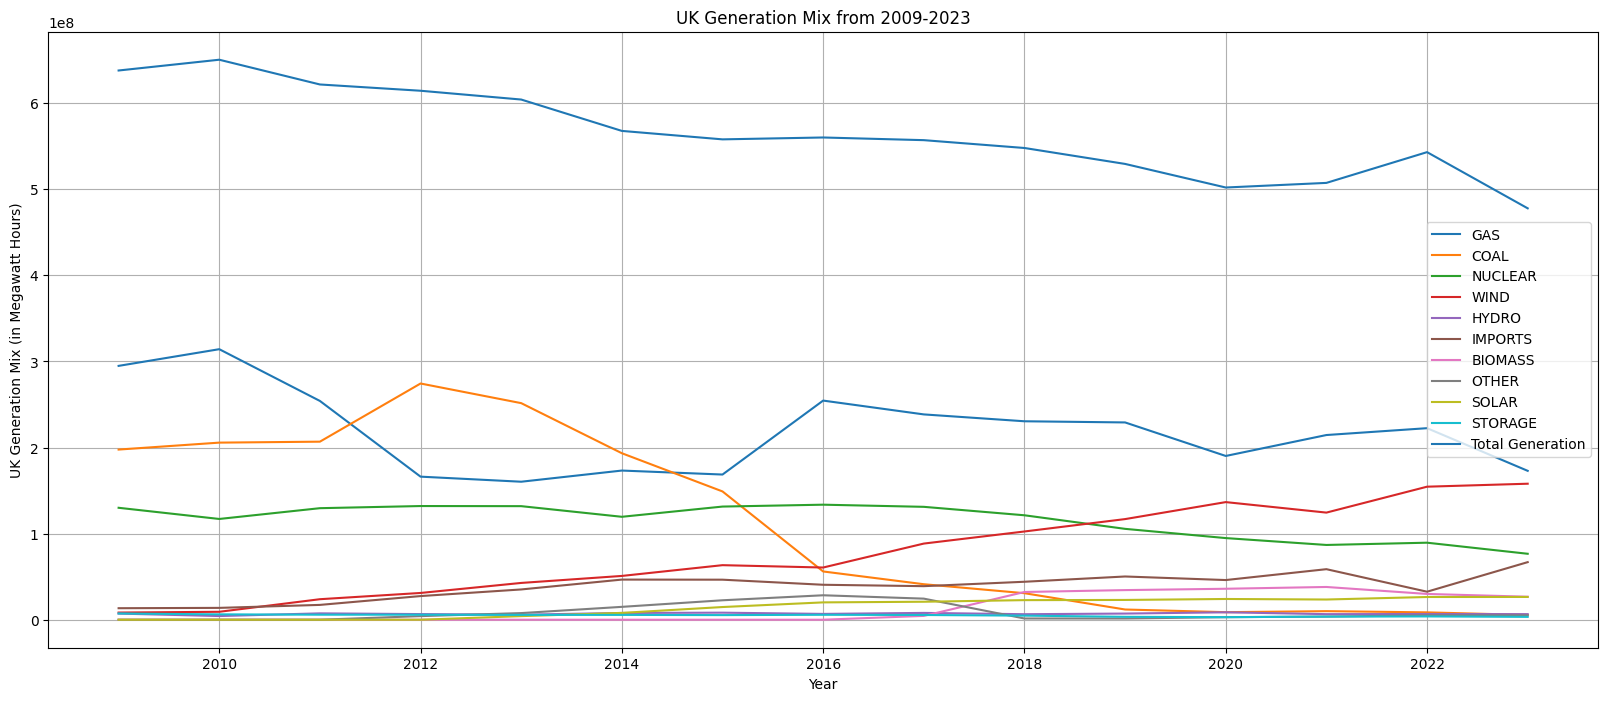

In [27]:
# Import required Libraries
import pandas as pd
import matplotlib.pyplot as plt

# import csv file as a pandas data-frame delimated by comma
df = pd.read_csv('Annual_Gen.csv', thousands=',')

# Plotting UK Generation Mix and Total Generation
plt.figure(figsize=(20, 8))
# Columns to plot
columns_to_plot = ['GAS', 'COAL', 'NUCLEAR', 'WIND', 'HYDRO', 'IMPORTS', 'BIOMASS', 'OTHER', 'SOLAR', 'STORAGE','Total Generation']
for source in columns_to_plot:
    plt.plot(df['DATETIME'], df[source], label=source)

plt.title('UK Generation Mix from 2009-2023')
plt.xlabel('Year')
plt.ylabel('UK Generation Mix (in Megawatt Hours)')
plt.legend()
plt.grid(True)
plt.show()

- Now Let's consider just different generation sources

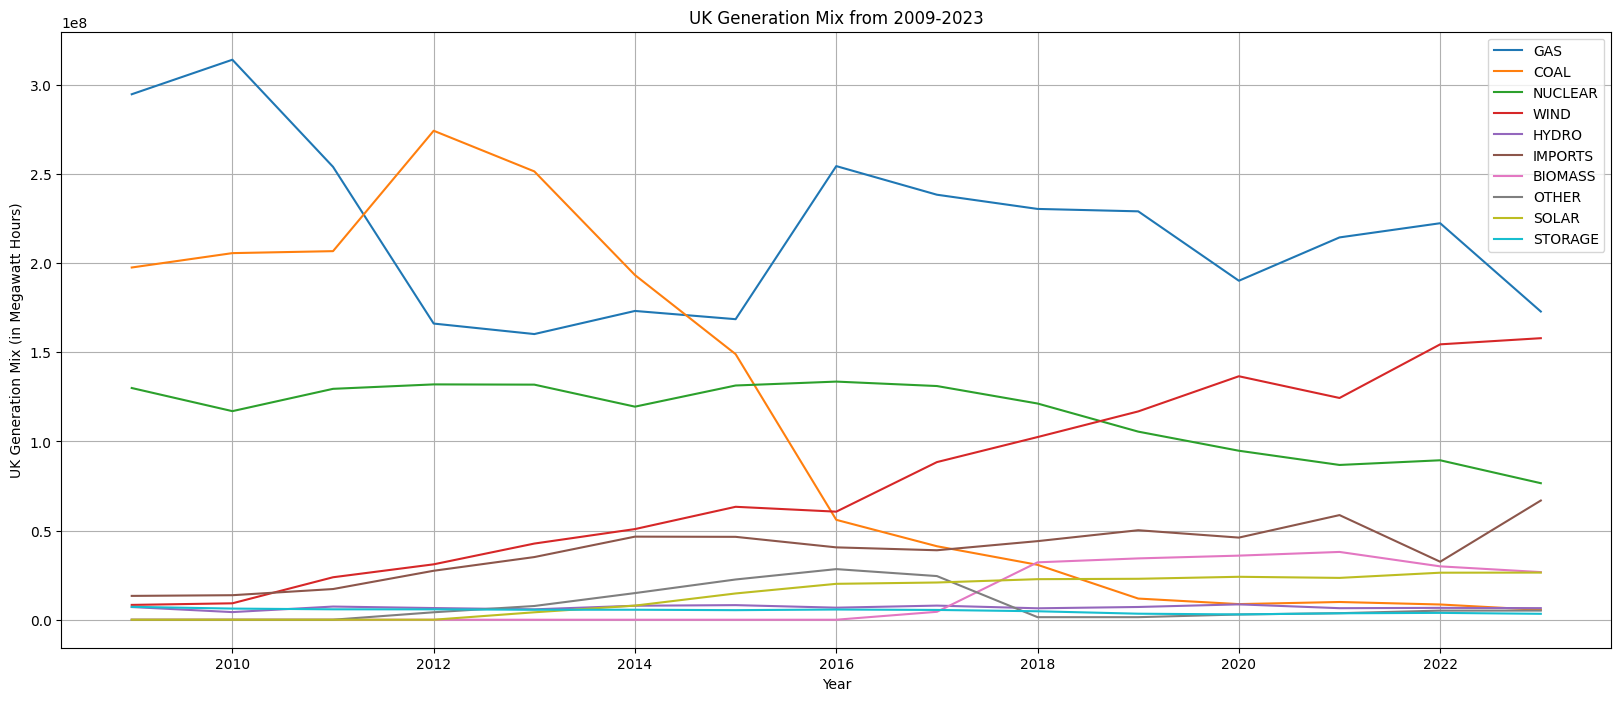

In [28]:
# Plotting UK Generation Mix
plt.figure(figsize=(20, 8))
# Columns to plot
columns_to_plot = ['GAS', 'COAL', 'NUCLEAR', 'WIND', 'HYDRO', 'IMPORTS', 'BIOMASS', 'OTHER', 'SOLAR', 'STORAGE']
for source in columns_to_plot:
    plt.plot(df['DATETIME'], df[source], label=source)

plt.title('UK Generation Mix from 2009-2023')
plt.xlabel('Year')
plt.ylabel('UK Generation Mix (in Megawatt Hours)')
plt.legend()
plt.grid(True)
plt.show()

______________________________________________________________________________________________________
## UK Generation Mix Carbon and Zero Carbon Generation

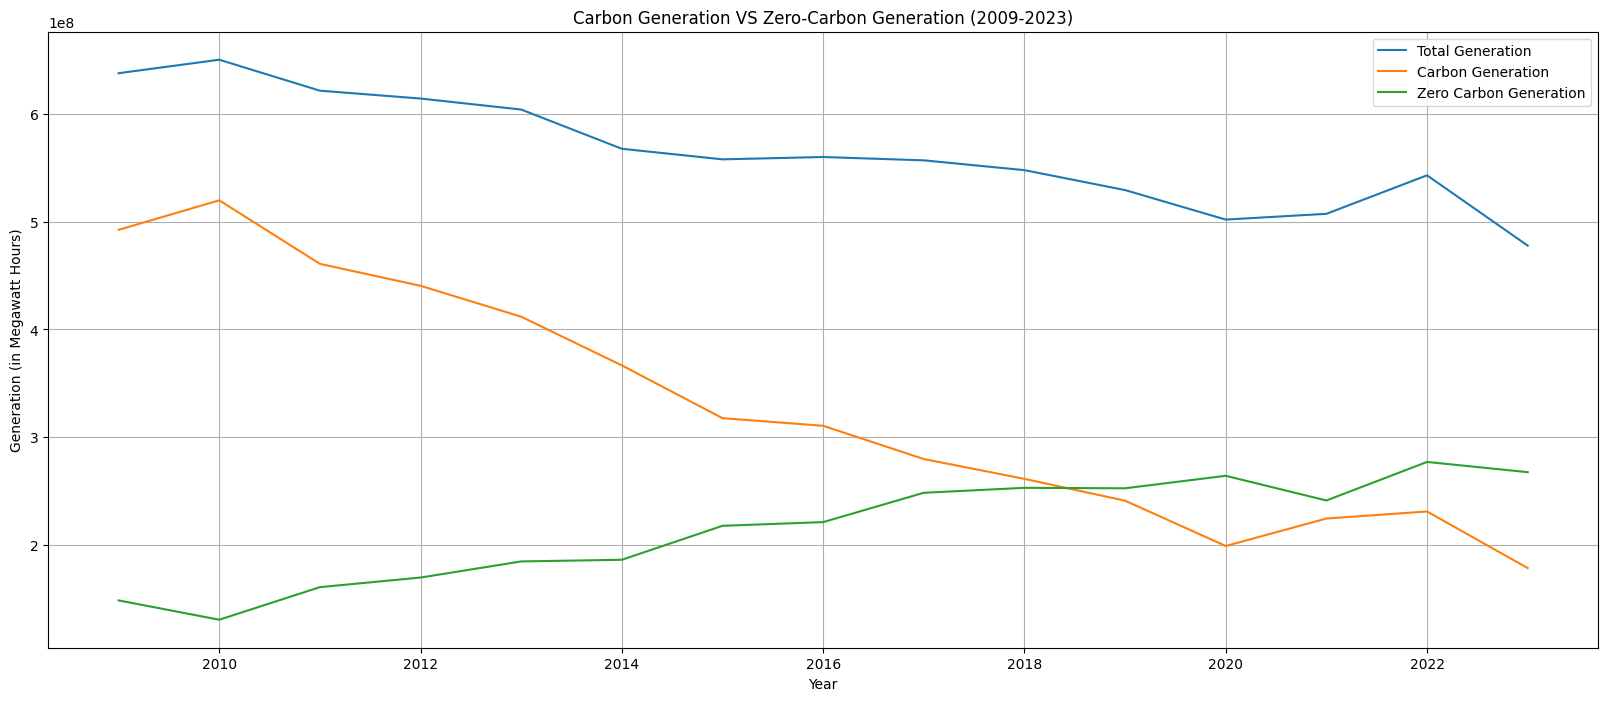

In [29]:
# Plotting UK Generation Mix Carbon and Zero Carbon Generation
plt.figure(figsize=(20, 8))
# Columns to plot
columns_to_plot = ['Total Generation', 'Carbon Generation', 'Zero Carbon Generation']
for source in columns_to_plot:
    plt.plot(df['DATETIME'], df[source], label=source)

plt.title('Carbon Generation VS Zero-Carbon Generation (2009-2023)')
plt.xlabel('Year')
plt.ylabel('Generation (in Megawatt Hours)')
plt.legend()
plt.grid(True)
plt.show()

- #### This Plot shows how Zero Carbon Generation increased and tripled from 2009 to 2023, even though total generation decreased.
- #### The Plot also shows how Carbon generation reduced to one-fifth of 2009 values in 2023

______________________________________________________________________________________________________
## UK Generation Mix Carbon Intensity
- The carbon intensity of electricity generation refers to the amount of carbon dioxide (CO2) emissions produced per unit of electricity generated. It is a measure of how much greenhouse gas emissions are associated with the production of electrical power.
- 
Carbon intensity is typically expressed in units such as grams or kilograms of CO2 emitted per kilowatt-hour (gCO2/kWh or kgCO2/kWh) of electricity generated. The lower the carbon intensity, the cleaner and more environmentally friendly the electricity generation process.- 

Renewable energy sources such as solar, wind, hydro, and biomass generally have lower carbon intensity because they do not rely on burning fossil fuels, which release a significant amount of carbon dioxide. In contrast, electricity generation from fossil fuels like coal, gas, and oil tends to have higher carbon intensity due to the combustion of these carbon-rich fuel- s.

Reducing the carbon intensity of electricity generation is a key objective in addressing climate change, and it can be achieved by transitioning to low-carbon and renewable energy sources, improving energy efficiency, and implementing carbon capture and storage technol
ogies.

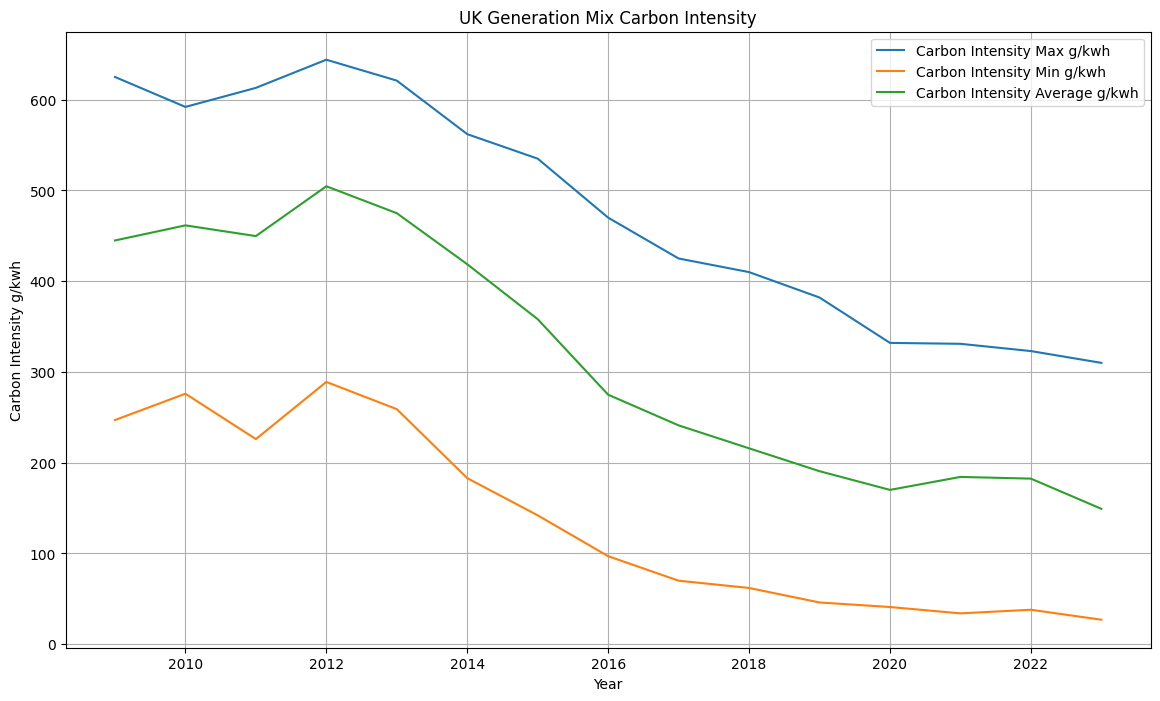

In [30]:
# Plotting UK Generation Mix Carbon Intensity
plt.figure(figsize=(14, 8))
# Columns to plot
columns_to_plot = ['Carbon Intensity Max g/kwh', 'Carbon Intensity Min g/kwh', 'Carbon Intensity Average g/kwh']
for source in columns_to_plot:
    plt.plot(df['DATETIME'], df[source], label=source)

plt.title('UK Generation Mix Carbon Intensity')
plt.xlabel('Year')
plt.ylabel('Carbon Intensity g/kwh')
plt.legend()
plt.grid(True)
plt.show()

- #### The Plot shows how the UK achieved a reduced carbon foot-print and decreased Carbon Intensity from 2009 to 2023
- #### Carbon Intensity change simultaneously depend on the share of zero-carbon generation from the whole of generation mix 

______________________________________________________________________________________________________
## UK Generation Mix Zero Carbon Operation (ZCO)
- Zero Carbon Operation (ZCO) typically refers to the percentage or portion of electricity generation that comes from zero-carbon sources 

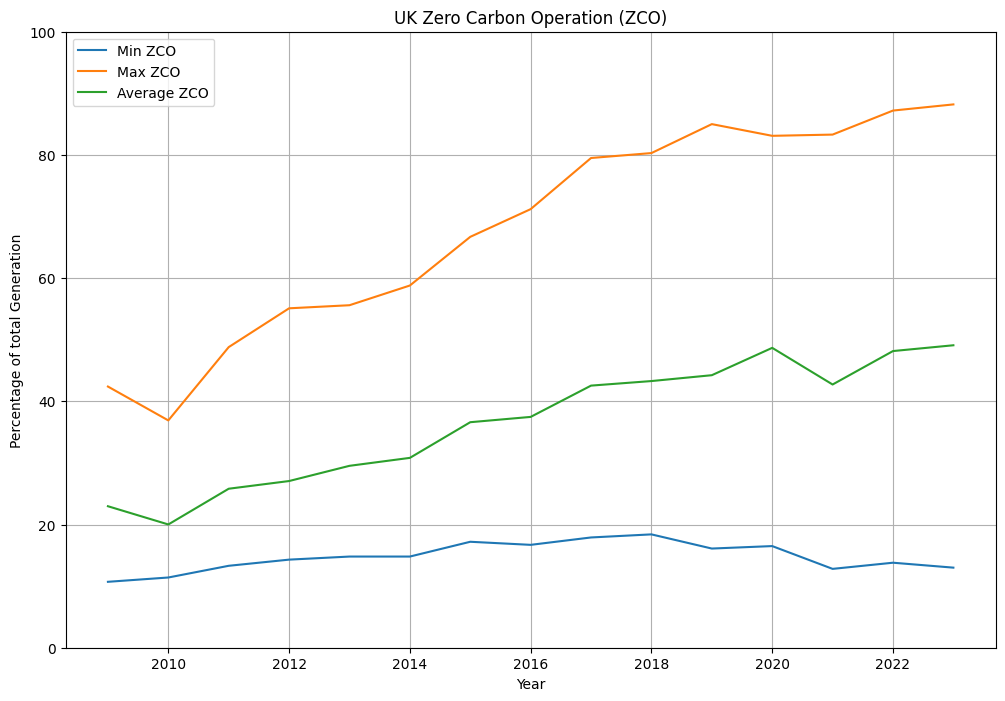

In [31]:
# Plotting Zero Carbon Operation (ZCO)
plt.figure(figsize=(12, 8))
# Columns to plot
columns_to_plot = ['Min ZCO', 'Max ZCO', 'Average ZCO']
for source in columns_to_plot:
    plt.plot(df['DATETIME'], df[source], label=source)

plt.title('UK Zero Carbon Operation (ZCO)')
plt.xlabel('Year')
plt.ylabel('Percentage of total Generation')
plt.legend()
# Set y-axis limits from 0 to 100
plt.ylim(0, 100)
plt.grid(True)
plt.show()

- Zero-carbon generation in the UK is primarily based on renewable energy sources. These sources, such as wind, solar, hydro, and biomass, are considered zero-carbon because they produce electricity without significant carbon dioxide (CO2) emissions during the generation process. The transition to zero-carbon generation is a crucial component of efforts to mitigate climate change and reduce the environmental impact of electricity production.

- The share of zero-carbon generation in the overall UK electricity mix fluctuates over time due to the intermittent nature of renewable energy sources. Unlike fossil fuel-based power plants that can provide a consistent output, renewable sources depend on natural factors like wind speed, sunlight, and water flow. As a result, the amount of electricity generated from renewables can vary throughout the day, seasons, and even year.

- During periods of favorable conditions, such as windy days or sunny weather, the share of zero-carbon generation tends to increase. Conversely, during periods of low renewable resource availability, other sources like fossil fuels or nuclear power may need to compensate, leading to a decrease in the share of zero-carbon generation.

- This variability underscores the importance of energy storage, grid flexibility, and complementary technologies to balance the intermittent nature of renewable generation and ensure a reliable and resilient energy supply. Policymakers, energy planners, and operators work towards strategies and technologies that enhance the consistency and reliability of zero-carbon generation, aiming for a more sustainable and environmentally friendly energy system in the long run.

#### Plot shows The UK achieved nearly **90%** Maximum Zero Carbon Operation in 2023, thanks to a significant increase in the integration of renewable energy sources into its electricity generation mix

______________________________________________________________________________________________________
## UK Renewable Generation Trend

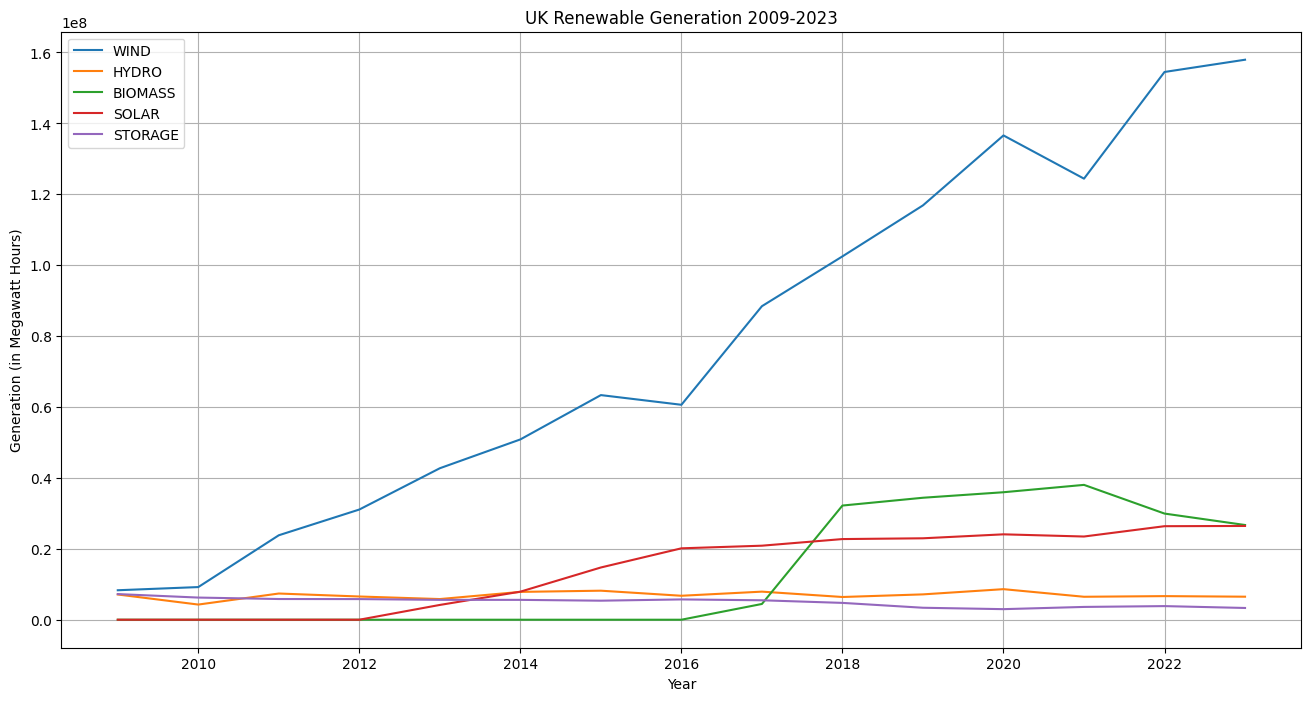

In [32]:
# Plotting UK Renewable Generation Trend
plt.figure(figsize=(16, 8))
# Columns to plot
columns_to_plot = ['WIND', 'HYDRO', 'BIOMASS',  'SOLAR', 'STORAGE']
for source in columns_to_plot:
    plt.plot(df['DATETIME'], df[source], label=source)

plt.title('UK Renewable Generation 2009-2023')
plt.xlabel('Year')
plt.ylabel('Generation (in Megawatt Hours)')
plt.legend()
plt.grid(True)
plt.show()

______________________________________________________________________________________________________
### Time⌚to Code💻
1️⃣ Write a code to analyse UK generation Mix between 2009 and 2023

#### Download UK Grid Data:

-Use the  https://www.nationalgrideso.com/data-portal/historic-generation-mix/historic_gb_generation_mix  and download all of grid data between 2009 and 2023
#### Convert Data to DataFrame:
- Use pandas to convert the downloaded data into a DataFrame.
- Ensure to parse the 'timestamp' column as datetime for time-based analysis.
- Filter Data for 2013 to 2023
#### Plot UK Generation Mix Line Chart:
- Extract the relevant columns representing the UK generation mix (e.g., coal, nuclear, wind, etc.).
- Use matplotlib to plot a line chart where the x-axis represents time (timestamps) and the y-axis represents the percentage contribution of each energy source.
#### Analyze Changes in Generation Mix:
- Observe trends and variations in the line chart over the specified time period.
- Look for patterns, seasonality, and shifts in the generation mix.
- Identify any significant changes in the contributions of different energy sources.
- Find the Non-Zero Minimum of each source 

______________________________________________________________________________________________________
2️⃣ Write a code to find an Event

#### Download UK Frequency Data:

- Use the  https://www.nationalgrideso.com/data-portal/system-frequency-dataand download Aug 2019 Frequency data
- Find the Minimum non zero Frequency Time-stamp and find relevant news and reports to that